## 02-Lab  - Bias Variance Trade-Off

In this lab, you will work with Auto dataset which we had seen in Polynomial Regression .
The dataset contains information about varoious cars/automobiles, the number of wheels, engine displacement along with their fuel efficiency.
Your task is to take "mpg" as the target variable and fit Polynomial Regressions of various degrees to find the test and train MSE.
Plot the train and test MSEs for high bias, high variance and finally a balanced bias-variance trade off.

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Auto.csv

In [1]:
# Import the library
import pandas as pd

auto = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Auto.csv', na_values='?').dropna()
auto.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [2]:
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


There are three cases that we want to generate - 

1) High bias <br>
2) Trade off <br>
3) High variance <br>

To generate the high bias case, the model complexity has to be low. This can be done through picking a small number of parameters for a given model. We will use polynomial regression for this. 

In [3]:
# select the mpg and horsepower columns and output the head
data_set = auto[['mpg','horsepower']]

# head of data_set
print(data_set.head())

    mpg  horsepower
0  18.0       130.0
1  15.0       165.0
2  18.0       150.0
3  16.0       150.0
4  17.0       140.0


### High bias case 
We will first run polynomial regression with number of parameter = 1 

In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics

# number of degrees in a polynomial 
degrees =  1 

X = data_set['horsepower']
y = data_set['mpg']

# we need to do test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=True)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)
ypred = pipeline.predict(X_test[:, np.newaxis])
print("mean squared error is {} ".format(metrics.mean_squared_error(y_test, ypred)))

mean squared error is 28.660132022989014 


mean squared error is 28.66013202298902 

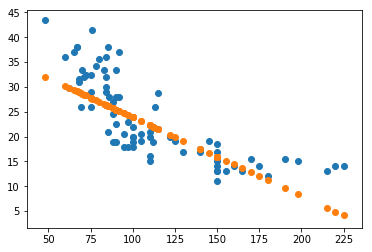

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X_test, y_test)
plt.scatter(X_test, ypred)
plt.show()

<img src="../../../images/lab_bias.png"> 


### Trade off

In [6]:
# number of degrees in a polynomial 
degrees_toff =  4

X = data_set['horsepower']
y = data_set['mpg']

# we need to do test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

polynomial_features = PolynomialFeatures(degree=degrees_toff,
                                             include_bias=True)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)
ypred = pipeline.predict(X_test[:, np.newaxis])
print("mean squared error is {} ".format(metrics.mean_squared_error(y_test, ypred)))

mean squared error is 21.263314043420245 


mean squared error is 21.263314043420245 

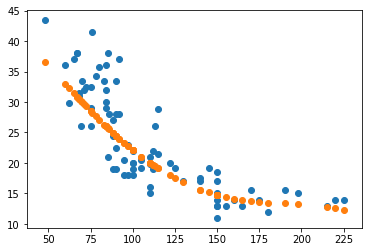

In [7]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, ypred)
plt.show()

<img src="../../../images/lab_trade_off.png"> 


### High variance

In [8]:
# number of degrees in a polynomial 
degrees_toff =  20

X = data_set['horsepower']
y = data_set['mpg']

# we need to do test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

polynomial_features = PolynomialFeatures(degree=degrees_toff,
                                             include_bias=True)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], y_train)
ypred = pipeline.predict(X_test[:, np.newaxis])
print("mean squared error is {} ".format(metrics.mean_squared_error(y_test, ypred)))

mean squared error is 40.273482791583525 


mean squared error is 40.273482791583525 

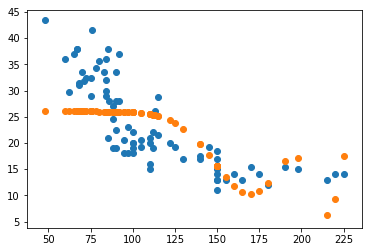

In [9]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, ypred)
plt.show()


<img src="../../../images/lab_variance.png"> 
